<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

n_obs = 10**6
pois2 = sts.poisson(2)
pois2_obs = pois2.rvs(n_obs)

ans1 = np.mean(pois2_obs > 6)
ans2 = (np.sum(pois2_obs > 5) - np.sum(pois2_obs == 6)) / n_obs
ans3 = ((np.sum(pois2_obs > 5) - np.sum(pois2_obs >= 7)) / n_obs) * np.mean(pois2_obs < 7)
ans4 = np.mean(pois2_obs**3)
ans5 = np.mean(pois2_obs) / np.mean(pois2_obs > 5)

In [ ]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

unif_1_3_rv = sts.uniform(1, 3)
exp_03_rv = sts.expon(0.3)

t1_time = unif_1_3_rv.rvs(n_obs)
t2_time = unif_1_3_rv.rvs(n_obs)

t_time = exp_03_rv.rvs(n_obs)

x1 = np.mean(t1_time <= t_time) * np.mean(t2_time > t_time)
x2 = np.mean(t1_time > t_time) * np.mean(t2_time <= t_time)

ans6 = (x1 + x2) * np.mean(t_time <= 1.5)

In [ ]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta = 10
alpha = 2

unif_1_theta_rv = sts.uniform(0, 1)

class RandomVariableClass(sts.rv_continuous):
    def __init__(self):
        super().__init__(self, a=1, b=theta)

    def _pdf(self, x):
        return (alpha * np.log(x) ** (alpha - 1)) / (x * np.log(theta) ** alpha)

    def _ppf(self, x):
        return theta ** (x ** (1/alpha))

    def _cdf(self, x):
        return (np.log(x) / np.log(theta)) ** alpha

some_rv = RandomVariableClass()
N = some_rv.rvs(size=10**6)

ans7 = np.mean(N)

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

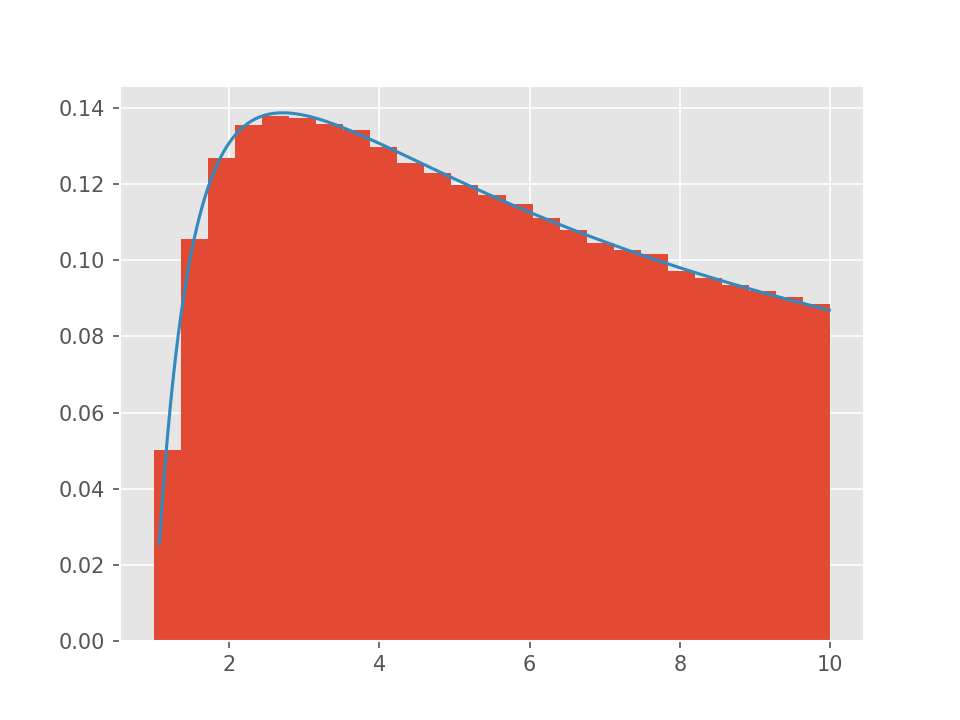

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

plt.hist(N, bins=25, density=True)
x = np.linspace(some_rv.ppf(0.001), some_rv.ppf(0.999), 500)
plt.plot(x, some_rv.pdf(x))

# your code here

In [ ]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you